In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

import plotly.express as px

In [3]:
df_fraud = pd.read_csv('ppp_fraud_cases.csv')
df_data = pd.read_csv('ppp_over_150k.csv')

In [4]:
df_fraud = df_fraud.rename(columns={'Company':'BorrowerName'})
df_fraud['fraud'] = 1
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BorrowerName  100 non-null    object
 1   State         100 non-null    object
 2   Source        100 non-null    object
 3   Suspects      100 non-null    object
 4   fraud         100 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 66 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanNumber                     968532 non-null  int64  
 1   DateApproved                   968532 non-null  object 
 2   SBAOfficeCode                  968532 non-null  int64  
 3   ProcessingMethod               968532 non-null  object 
 4   BorrowerName                   968525 non-null  object 
 5   BorrowerAddress                968532 non-null  object 
 6   BorrowerCity                   968532 non-null  object 
 7   BorrowerState                  968532 non-null  object 
 8   BorrowerZip                    968532 non-null  object 
 9   LoanStatusDate                 968532 non-null  object 
 10  LoanStatus                     968532 non-null  object 
 11  Term                           968532 non-null  int64  
 12  SBAGuarantyPercentage         

In [6]:
df_fraud.State.value_counts()

State
TX    22
VA     9
GA     8
WA     7
DC     6
MA     6
OK     5
MI     5
NJ     5
CA     4
SC     4
OH     3
FL     3
MN     3
NY     2
WY     2
AK     2
TN     1
Il     1
MO     1
AZ     1
Name: count, dtype: int64

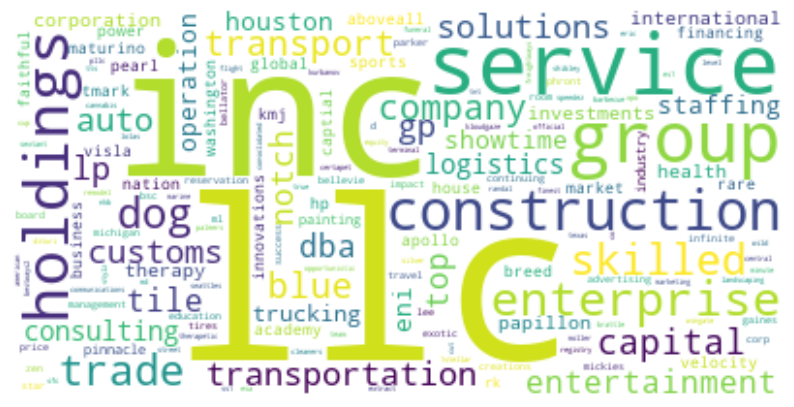

In [7]:
text = " ".join(df_fraud.BorrowerName)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text=text)
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
full_df = df_data.merge(df_fraud, on = 'BorrowerName', how='left')
full_df.shape

(968532, 70)

In [9]:
full_df['fraud'] = full_df['fraud'].apply(lambda x: 1 if x ==1 else 0)
full_df.fraud.value_counts()

fraud
0    968437
1        95
Name: count, dtype: int64

In [15]:
# percentage of fraudulent amount
print('total amount of forgiveness in dataset')
print(round(full_df['ForgivenessAmount'].sum(), 2), 'about 465 billion')
print('total amount of fraud in dataset forgiven')
print(full_df[full_df['fraud']==1]['ForgivenessAmount'].sum(), 'about 4.3 milion')
# Loan Approval Amount (current)
# print('CurrentApprovalAmount')
# print(full_df[full_df['fraud']==1]['CurrentApprovalAmount'].sum())
print('proportion of InitialApprovalAmount that was fraudulent')
print(full_df[full_df['fraud']==1]['InitialApprovalAmount'].sum() / full_df['InitialApprovalAmount'].sum() *100)

total amount of forgiveness in dataset
465028582170.96 about 465 billion
total amount of fraud in dataset forgiven
4299706.31 about 4.3 milion
proportion of InitialApprovalAmount that was fraudulent
0.011338308032683094


In [11]:
print('proportion of undispersed amount')
print(full_df[full_df['fraud']==1]['UndisbursedAmount'].sum() / full_df[full_df['fraud']==1]['CurrentApprovalAmount'].sum() *100)
print('all fraudulent loans paid out')

proportion of undispersed amount
0.0
all fraudulent loans paid out


In [12]:
# full_df[full_df['BorrowerName']=='apollo hp inc']['UndisbursedAmount']
full_df[full_df['fraud']==1].iloc[:, 38:46].describe()

,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID
count,95.0,95.000000,95.0,95.000000,95.0,95.000000
mean,0.0,6604.573579,0.0,105.631579,0.0,217728.873684
std,0.0,30562.472780,0.0,919.106644,0.0,191210.383490
min,0.0,0.000000,0.0,0.000000,0.0,9551.000000
25%,0.0,0.000000,0.0,0.000000,0.0,40724.000000
50%,0.0,0.000000,0.0,0.000000,0.0,188309.000000
75%,0.0,0.000000,0.0,0.000000,0.0,456756.000000
max,0.0,240640.000000,0.0,8898.000000,0.0,529431.000000


In [13]:
scatter_1_data  = full_df.groupby('BorrowerState')[['InitialApprovalAmount', 'fraud']].mean().reset_index()

fig = px.scatter(scatter_1_data, x='InitialApprovalAmount', y='fraud', hover_data=['BorrowerState'])
fig.show()